In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import scratchNNlib as sc

In [3]:
class XORNeural(sc.NN):
    def __init__(self):
        super().__init__()
        self.chain = [
            sc.Layers.LinearLayer(2, 3),
            sc.Layers.ActivationLayer.ReLU(),
            sc.Layers.LinearLayer(3, 1),
            sc.Layers.ActivationLayer.Tanh(),
        ]

epoch 1/10000   error=0.447059
epoch 2/10000   error=0.446403
epoch 3/10000   error=0.445730
epoch 4/10000   error=0.445039
epoch 5/10000   error=0.444330
epoch 6/10000   error=0.443603
epoch 7/10000   error=0.442856
epoch 8/10000   error=0.442088
epoch 9/10000   error=0.441300
epoch 10/10000   error=0.440489
epoch 11/10000   error=0.439655
epoch 12/10000   error=0.438798
epoch 13/10000   error=0.437915
epoch 14/10000   error=0.437006
epoch 15/10000   error=0.436069
epoch 16/10000   error=0.435104
epoch 17/10000   error=0.434110
epoch 18/10000   error=0.433083
epoch 19/10000   error=0.432024
epoch 20/10000   error=0.430931
epoch 21/10000   error=0.429802
epoch 22/10000   error=0.428634
epoch 23/10000   error=0.427427
epoch 24/10000   error=0.426178
epoch 25/10000   error=0.424886
epoch 26/10000   error=0.423547
epoch 27/10000   error=0.422160
epoch 28/10000   error=0.420721
epoch 29/10000   error=0.419228
epoch 30/10000   error=0.417679
epoch 31/10000   error=0.416069
epoch 32/10000   

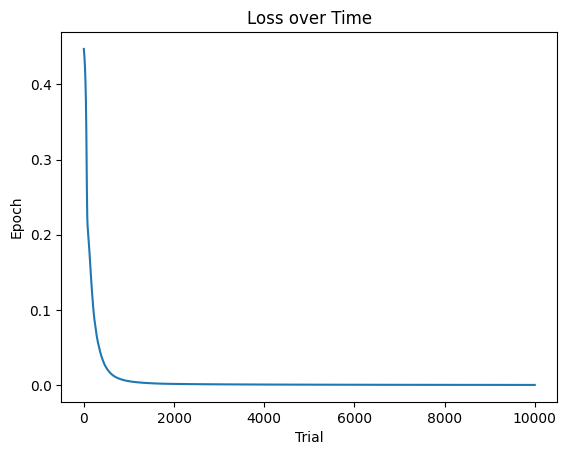

In [4]:
if __name__ == "__main__":
    epochs = 10000
    lr = 0.01
    
    loss_function = sc.Loss.MeanSquare()
    secondTry = XORNeural()
    x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
    y_train = np.array([[[0]], [[1]], [[1]], [[0]]])
    
    samples = len(x_train)
    
    toPlot = [[i for i in range(epochs)], []]

    for i in range(epochs):
        error = 0
        for sample in range(samples):
            output = secondTry.forwardProp(x_train[sample].T)
            #print(f'NN output: {output}, expected value: {y_train[sample]}')
            #print(f'sample: {x_train[sample].T}')

            error += loss_function(output, y_train[sample])
            
            #print(f'Loss: {error}')
        
            loss = loss_function.backward()
            #print(f'Gradiant: {loss}')
            secondTry.backProp(loss, lr)
        error /= samples
        toPlot[1].append(error)
        print('epoch %d/%d   error=%f' % (i+1, epochs, error))
        

plt.plot(*toPlot)
plt.title('Loss over Time')
plt.xlabel('Trial')
plt.ylabel('Epoch')
plt.show()

In [5]:
for i in [0,1]:
    for j in [0,1]:
        l = [i, j]
        nnGuess = secondTry.forwardProp(np.array([l]).T)
        expected = np.logical_xor(*l).astype(int)
        print(np.logical_xor(*l))
        print(f'For input {[i,j]}, The nn predicts {nnGuess} vs. \nthe expected {expected}\n')

False
For input [0, 0], The nn predicts [[0.00053781]] vs. 
the expected 0

True
For input [0, 1], The nn predicts [[0.98757179]] vs. 
the expected 1

True
For input [1, 0], The nn predicts [[0.96663056]] vs. 
the expected 1

False
For input [1, 1], The nn predicts [[0.00041888]] vs. 
the expected 0

